In [46]:
import numpy as np 
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import re
import os
#最大表示列数の指定（ここでは50列を指定）
pd.set_option('display.max_columns', 50)


訓練データとテストデータの読み込み

In [47]:
train = pd.read_csv("../data/train.csv", index_col="id")
test = pd.read_csv("../data/test.csv", index_col="id")


In [48]:
train.head()

,product_code,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,measurement_3,measurement_4,measurement_5,measurement_6,measurement_7,measurement_8,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17,failure
id,,,,,,,,,,,,,,,,,,,,,,,,,
0,A,80.10,material_7,material_8,9,5,7,8,4,18.040,12.518,15.748,19.292,11.739,20.155,10.672,15.859,17.594,15.193,15.029,NaN,13.034,14.684,764.100,0
1,A,84.89,material_7,material_8,9,5,14,3,3,18.213,11.540,17.717,17.893,12.748,17.889,12.448,17.947,17.915,11.755,14.732,15.425,14.395,15.631,682.057,0
2,A,82.43,material_7,material_8,9,5,12,1,5,18.057,11.652,16.738,18.240,12.718,18.288,12.715,15.607,NaN,13.798,16.711,18.631,14.094,17.946,663.376,0
3,A,101.07,material_7,material_8,9,5,13,2,6,17.295,11.188,18.576,18.339,12.583,19.060,12.471,16.346,18.377,10.020,15.250,15.562,16.154,17.172,826.282,0
4,A,188.06,material_7,material_8,9,5,9,2,8,19.346,12.950,16.990,15.746,11.306,18.093,10.337,17.082,19.932,12.428,16.182,12.760,13.153,16.412,579.885,0


In [49]:
test.head()

,product_code,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,measurement_3,measurement_4,measurement_5,measurement_6,measurement_7,measurement_8,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17
id,,,,,,,,,,,,,,,,,,,,,,,,
26570,F,119.57,material_5,material_6,6,4,6,9,6,19.305,10.178,17.534,18.168,11.598,18.654,10.802,15.909,18.070,13.772,13.659,16.825,13.742,17.710,634.612
26571,F,113.51,material_5,material_6,6,4,11,8,0,17.883,11.927,17.228,16.033,11.179,19.368,12.032,13.998,NaN,12.473,17.468,16.708,14.776,14.102,537.037
26572,F,112.16,material_5,material_6,6,4,8,12,4,18.475,10.481,16.619,18.189,12.126,17.774,11.743,17.046,18.086,10.907,13.363,15.737,17.065,16.021,658.995
26573,F,112.72,material_5,material_6,6,4,8,11,10,16.518,10.888,15.293,18.592,11.304,18.948,11.790,18.165,16.163,10.933,15.501,15.667,12.620,16.111,594.301
26574,F,208.00,material_5,material_6,6,4,14,16,8,17.808,12.693,17.678,15.814,13.431,19.141,12.370,14.578,17.849,11.941,16.070,16.183,13.324,17.150,801.044


False
False


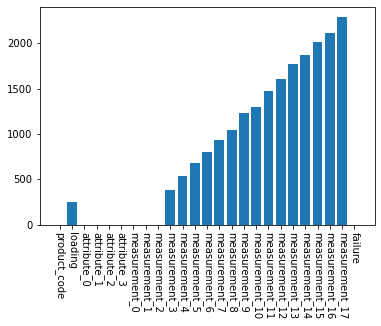

In [50]:
#欠損値がないか確認（nullが1つもなければ以下のprint文でTrueが出力される）
print(np.all(train.isnull().sum() == 0))
print(np.all(test.isnull().sum() == 0))

train_miss = train.isnull().sum()
plt.bar(train_miss.index, train_miss)
plt.xticks(rotation=270)
plt.show()


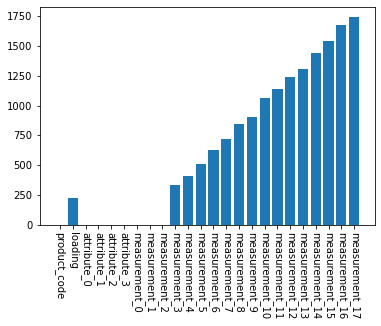

In [51]:
test_miss = test.isnull().sum()
plt.bar(test_miss.index, test_miss)
plt.xticks(rotation=270)
plt.show()


In [52]:
#欠損値補完（特徴量ごとの平均値を採用）
train.fillna(train.mean(), inplace=True)
test.fillna(test.mean(), inplace=True)

#欠損値がないか確認（nullが1つもなければTrueが出力される）
print(np.all(train.isnull().sum() == 0))
print(np.all(test.isnull().sum() == 0))


True
True


In [53]:
#データを標準化する列を抽出（数値変数のみ）
cols = [col for col in train.columns if col not in ["id", "product_code",
 "failure", "attribute_2", "attribute_3", "attribute_1", "attribute_0"]]

train[cols] = (train[cols] - train[cols].mean()) / train[cols].std(ddof=0)
test[cols] = (test[cols] - test[cols].mean()) / test[cols].std(ddof=0)


In [54]:
#ラベルエンコーディングを実施

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(train["product_code"])
train["product_code"] = le.transform(train["product_code"])
le.fit(train["attribute_0"])
train["attribute_0"] = le.transform(train["attribute_0"])
le.fit(train["attribute_1"])
train["attribute_1"] = le.transform(train["attribute_1"])
le.fit(test["product_code"])
test["product_code"] = le.transform(test["product_code"])
le.fit(test["attribute_0"])
test["attribute_0"] = le.transform(test["attribute_0"])
le.fit(test["attribute_1"])
test["attribute_1"] = le.transform(test["attribute_1"])


In [61]:
#Onehotエンコーディングを実施
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False)
col = ["attribute_0", "attribute_1", "attribute_2", "attribute_3"]
ohe.fit(train[col])
print(ohe.categories_)
ohe.fit(test[col])
print(ohe.categories_)


[array([0, 1]), array([0, 1, 2]), array([5, 6, 8, 9], dtype=int64), array([5, 6, 8, 9], dtype=int64)]
[array([0, 1]), array([0, 1, 2]), array([6, 7, 9], dtype=int64), array([4, 5, 7, 9], dtype=int64)]


In [56]:

dummy_val_train = pd.DataFrame(ohe.transform(train[col]), columns = new_cat)
dummy_val_test = pd.DataFrame(ohe.transform(test[col]), columns = new_cat)

train = pd.concat([train.drop(col, axis=1), dummy_val_train], axis=1)
test = pd.concat([test.drop(col, axis=1), dummy_val_test], axis=1)

['attribute_0_0', 'attribute_0_1', 'attribute_1_0', 'attribute_1_1', 'attribute_1_2', 'attribute_2_6', 'attribute_2_7', 'attribute_2_9', 'attribute_3_4', 'attribute_3_5', 'attribute_3_7', 'attribute_3_9']


ValueError: Found unknown categories [5, 8] in column 2 during transform

In [ ]:
train.head()

,product_code,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,measurement_3,measurement_4,measurement_5,measurement_6,measurement_7,measurement_8,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17,failure
id,,,,,,,,,,,,,,,,,,,,,,,,,
0,0,-1.228625,1,2,9,5,-0.101025,-0.055370,-0.681939,0.249978,0.797229,-1.402756,1.815874,0.022763,1.143458,-0.777561,-0.188685,-1.067610e+00,2.418513,-0.559057,5.434101e-14,-1.316944,-1.083606,0.532994,0
1,0,-1.105315,1,2,9,5,1.599402,-1.246039,-0.984141,0.424027,-0.194728,0.598997,0.389673,1.049201,-1.148949,1.042531,1.334153,-8.504467e-01,0.036401,-0.825188,-4.334533e-01,-0.403199,-0.506041,-0.162976,0
2,0,-1.168644,1,2,9,5,1.113565,-1.722306,-0.379737,0.267081,-0.081129,-0.396288,0.743420,1.018683,-0.745299,1.316160,-0.372476,-2.980329e-13,1.451949,0.948121,1.795538e+00,-0.605283,0.905852,-0.321446,0
3,0,-0.688791,1,2,9,5,1.356484,-1.484172,-0.077535,-0.499536,-0.551751,1.472286,0.844345,0.881349,0.035697,1.066102,0.166498,-5.378933e-01,-1.165742,-0.361027,-3.382032e-01,0.777754,0.433798,1.060484,0
4,0,1.550609,1,2,9,5,0.384811,-1.484172,0.526868,1.563892,1.235394,-0.140096,-1.799071,-0.417721,-0.942571,-1.120878,0.703284,5.140994e-01,0.502707,0.474104,-2.286311e+00,-1.237050,-0.029718,-1.029700,0
